# Pokemon Challenge
## About
This project aims to predict wich pokemon would win a 1x1 battle based in their status.<br>
The project exploring the pokemon status can be found <a href='https://github.com/alcinoluiz/Pokemon-Data-Analysis'>here</a>.

### Import libs

In [1]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()
sns.set(style="whitegrid")

### Import data

In [2]:
df_combats = pd.read_csv('pokemon-challenge/combats.csv')
df_pokemon = pd.read_csv('pokemon-challenge/pokemon.csv')
df_tests = pd.read_csv('pokemon-challenge/tests.csv')

### Explore data

#### Create type/color for a better visualization

In [3]:
types1 = df_pokemon['Type 1'].unique()
types1_colors = ['#7AC74C', '#EE8130', '#6390F0', '#A6B91A', 
                 '#A8A77A', '#A33EA1', '#F7D02C', '#E2BF65', '#D685AD', '#C22E28', '#F95587', '#B6A136',
                 '#735797', '#96D9D6', '#6F35FC', '#705746', '#B7B7CE', '#A98FF3'
                ]

type1_colors = {}

for i, type1 in enumerate(types1):
    type1_colors[type1] = types1_colors[i]
print(type1_colors)

{'Grass': '#7AC74C', 'Fire': '#EE8130', 'Water': '#6390F0', 'Bug': '#A6B91A', 'Normal': '#A8A77A', 'Poison': '#A33EA1', 'Electric': '#F7D02C', 'Ground': '#E2BF65', 'Fairy': '#D685AD', 'Fighting': '#C22E28', 'Psychic': '#F95587', 'Rock': '#B6A136', 'Ghost': '#735797', 'Ice': '#96D9D6', 'Dragon': '#6F35FC', 'Dark': '#705746', 'Steel': '#B7B7CE', 'Flying': '#A98FF3'}


#### Return palette

In [4]:
def get_color_by_type(dataframe):
    palette_by_name = {}
    for index, row in dataframe.iterrows():
        palette_by_name[row['Name']] = type1_colors[row['Type 1']]
    return palette_by_name

In [5]:
df_combats.head()

,First_pokemon,Second_pokemon,Winner
0,266,298,298
1,702,701,701
2,191,668,668
3,237,683,683
4,151,231,151


In [6]:
df_combats.tail()

,First_pokemon,Second_pokemon,Winner
49995,707,126,707
49996,589,664,589
49997,303,368,368
49998,109,89,109
49999,9,73,9


In [7]:
df_combats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 3 columns):
First_pokemon     50000 non-null int64
Second_pokemon    50000 non-null int64
Winner            50000 non-null int64
dtypes: int64(3)
memory usage: 1.1 MB


In [8]:
df_pokemon.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [9]:
df_pokemon.tail()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
795,796,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True
796,797,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True
797,798,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
798,799,Hoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True
799,800,Volcanion,Fire,Water,80,110,120,130,90,70,6,True


In [10]:
df_pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
#             800 non-null int64
Name          799 non-null object
Type 1        800 non-null object
Type 2        414 non-null object
HP            800 non-null int64
Attack        800 non-null int64
Defense       800 non-null int64
Sp. Atk       800 non-null int64
Sp. Def       800 non-null int64
Speed         800 non-null int64
Generation    800 non-null int64
Legendary     800 non-null bool
dtypes: bool(1), int64(8), object(3)
memory usage: 69.6+ KB


In [11]:
df_tests.head()

,First_pokemon,Second_pokemon
0,129,117
1,660,211
2,706,115
3,195,618
4,27,656


In [12]:
df_tests.tail()

,First_pokemon,Second_pokemon
9995,216,498
9996,113,404
9997,493,104
9998,643,259
9999,678,531


#### Win/Lose by pokemon

In [13]:
wl_pkm = df_pokemon
wl_pkm = wl_pkm.set_index(['#'])
print(wl_pkm.info())
wl_pkm.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 1 to 800
Data columns (total 11 columns):
Name          799 non-null object
Type 1        800 non-null object
Type 2        414 non-null object
HP            800 non-null int64
Attack        800 non-null int64
Defense       800 non-null int64
Sp. Atk       800 non-null int64
Sp. Def       800 non-null int64
Speed         800 non-null int64
Generation    800 non-null int64
Legendary     800 non-null bool
dtypes: bool(1), int64(7), object(3)
memory usage: 69.5+ KB
None


,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [14]:
wl_pkm['Wins'] = 0
wl_pkm['Loses'] = 0

for i in df_combats.index:
    pk1 = df_combats.at[i, 'First_pokemon']
    pk2 =  df_combats.at[i, 'Second_pokemon']
    winner = df_combats.at[i, 'Winner']
    
    if(winner == pk1):
        wl_pkm.at[pk1, 'Wins'] += 1
        wl_pkm.at[pk2, 'Loses'] += 1
    else:
        wl_pkm.at[pk2, 'Wins'] += 1
        wl_pkm.at[pk1, 'Loses'] += 1
wl_pkm.head()

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Wins,Loses
#,,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,37,96
2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,46,75
3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,89,43
4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,70,55
5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False,55,57


In [15]:
wl_pkm.at[1, 'Name']


'Bulbasaur'

In [16]:
wl_pkm.tail()

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Wins,Loses
#,,,,,,,,,,,,,
796,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True,39,66
797,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True,116,15
798,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True,60,59
799,Hoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True,89,55
800,Volcanion,Fire,Water,80,110,120,130,90,70,6,True,75,46


In [17]:
wl_pkm['Total battle'] = wl_pkm['Wins'] + wl_pkm['Loses']
wl_pkm.head()

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Wins,Loses,Total battle
#,,,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,37,96,133
2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,46,75,121
3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,89,43,132
4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,70,55,125
5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False,55,57,112


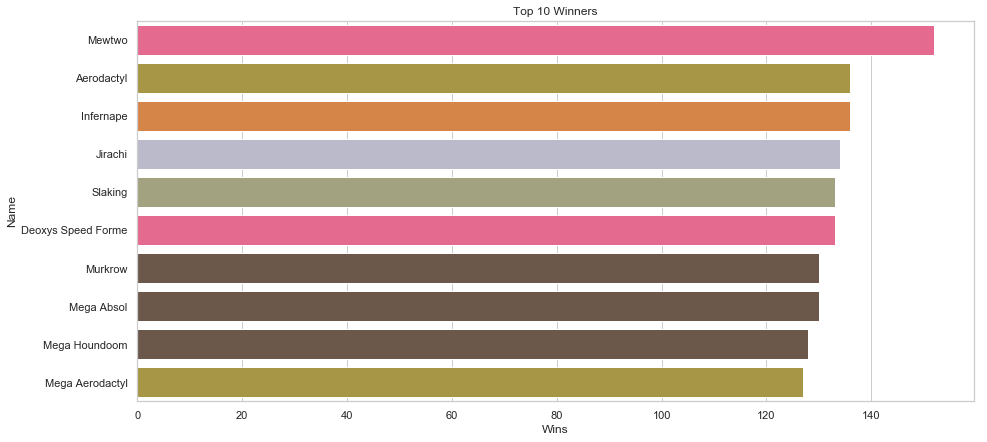

In [18]:
f, ax = plt.subplots(figsize=(15, 7))
data = wl_pkm.nlargest(10, 'Wins')
sns.barplot(x="Wins", y='Name', data=data, palette=get_color_by_type(data)).set_title('Top 10 Winners');

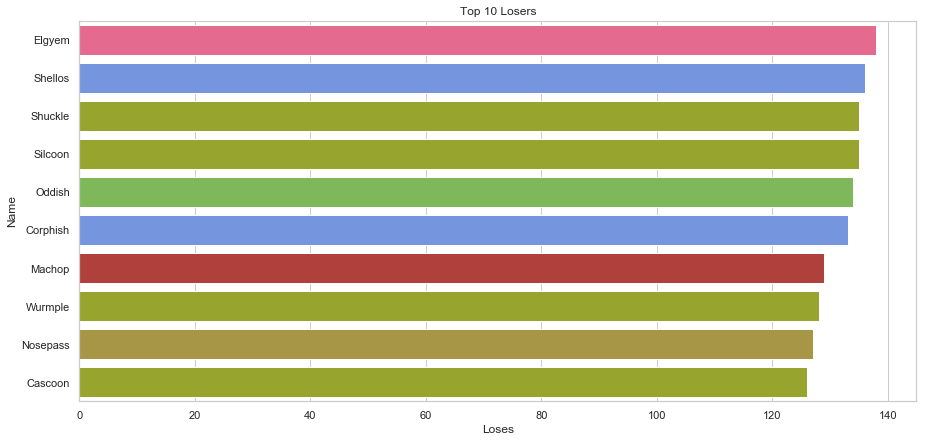

In [19]:
f, ax = plt.subplots(figsize=(15, 7))
data = wl_pkm.nlargest(10, 'Loses')
sns.barplot(x="Loses", y='Name', data=data, palette=get_color_by_type(data)).set_title('Top 10 Losers');

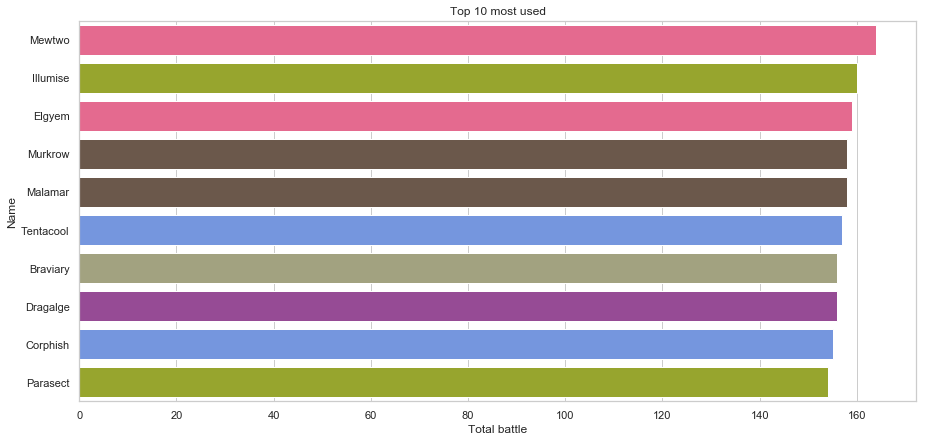

In [20]:
f, ax = plt.subplots(figsize=(15, 7))
data = wl_pkm.nlargest(10, 'Total battle')
sns.barplot(x="Total battle", y='Name', data=data, palette=get_color_by_type(data)).set_title('Top 10 most used');

### Never used

In [21]:
wl0 = wl_pkm.loc[wl_pkm['Total battle'] == 0]
wl0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16 entries, 12 to 782
Data columns (total 14 columns):
Name            16 non-null object
Type 1          16 non-null object
Type 2          8 non-null object
HP              16 non-null int64
Attack          16 non-null int64
Defense         16 non-null int64
Sp. Atk         16 non-null int64
Sp. Def         16 non-null int64
Speed           16 non-null int64
Generation      16 non-null int64
Legendary       16 non-null bool
Wins            16 non-null int64
Loses           16 non-null int64
Total battle    16 non-null int64
dtypes: bool(1), int64(10), object(3)
memory usage: 1.8+ KB


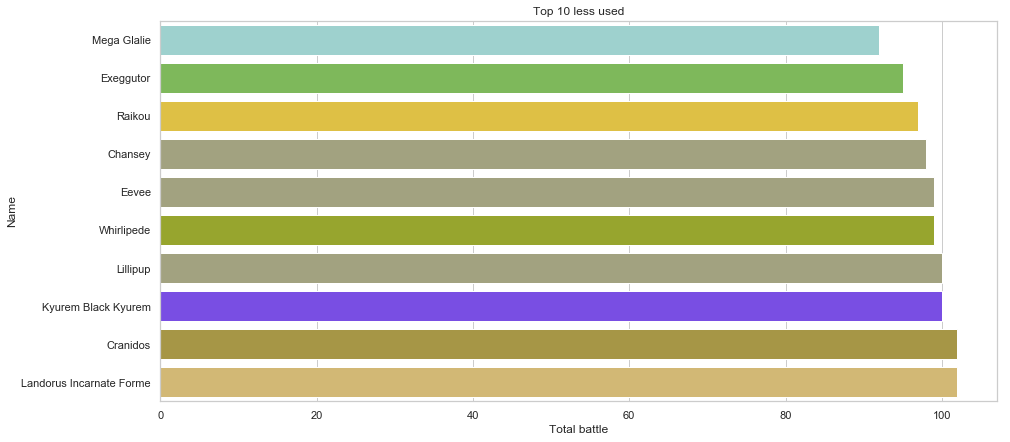

In [22]:
f, ax = plt.subplots(figsize=(15, 7))
data = wl_pkm.loc[wl_pkm['Total battle'] > 0].nsmallest(10, 'Total battle')
sns.barplot(x="Total battle", y='Name', data=data, palette=get_color_by_type(data)).set_title('Top 10 less used');


In [23]:
wl0

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Wins,Loses,Total battle
#,,,,,,,,,,,,,,
12,Blastoise,Water,NaN,79,83,100,85,105,78,1,False,0,0,0
33,Sandshrew,Ground,NaN,50,75,85,20,30,40,1,False,0,0,0
46,Wigglytuff,Normal,Fairy,140,70,45,85,50,45,1,False,0,0,0
66,Poliwag,Water,NaN,40,50,40,40,40,90,1,False,0,0,0
78,Victreebel,Grass,Poison,80,105,65,100,70,70,1,False,0,0,0
90,Magneton,Electric,Steel,50,60,95,120,70,70,1,False,0,0,0
144,Ditto,Normal,NaN,48,48,48,48,48,48,1,False,0,0,0
183,Ariados,Bug,Poison,70,90,70,60,60,40,2,False,0,0,0
236,Ursaring,Normal,NaN,90,130,75,75,75,55,2,False,0,0,0


/home/flatline/anaconda3/envs/py36/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


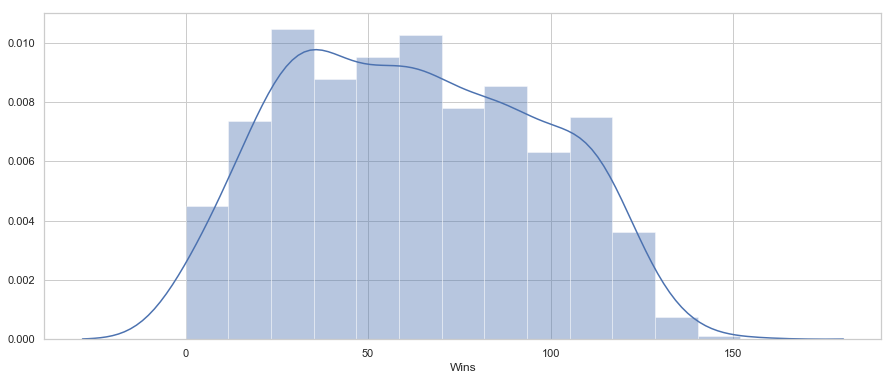

In [24]:
f, ax = plt.subplots(figsize=(15, 6))
sns.distplot(wl_pkm.Wins);

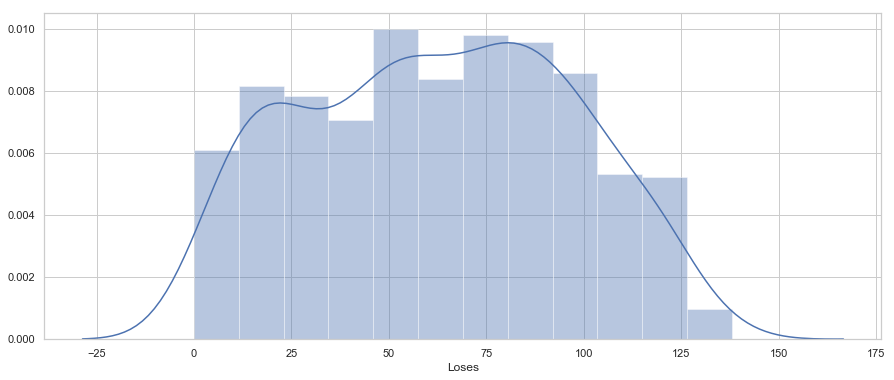

In [25]:
f, ax = plt.subplots(figsize=(15, 6))
sns.distplot(wl_pkm.Loses);

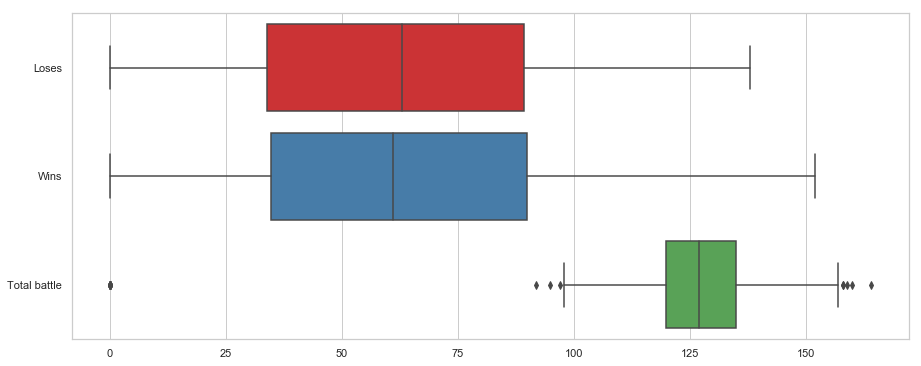

In [26]:
f, ax = plt.subplots(figsize=(15, 6))
sns.boxplot(data=wl_pkm[['Loses','Wins','Total battle']], palette="Set1", orient='h')

#### Total battle by types

In [27]:
wl_pkm.groupby(['Type 1']).sum()[['Wins', 'Loses', 'Total battle']]

,Wins,Loses,Total battle
Type 1,,,
Bug,3772,4988,8760
Dark,2447,1398,3845
Dragon,2490,1442,3932
Electric,3370,1976,5346
Fairy,707,1444,2151
Fighting,1543,1763,3306
Fire,3802,2750,6552
Flying,362,116,478
Ghost,1877,2031,3908


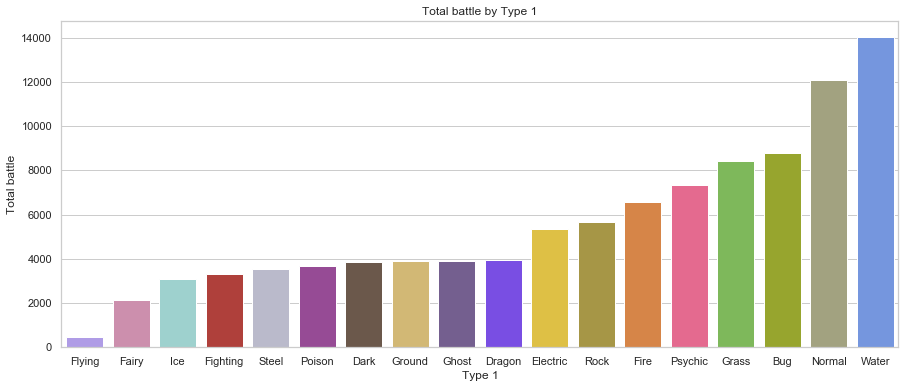

In [28]:
f, ax = plt.subplots(figsize=(15, 6))

data = wl_pkm.groupby(['Type 1'], as_index=False).sum()
order = data.sort_values(ascending=True, by=['Total battle'])

sns.barplot(x='Type 1', y="Total battle", data=data, palette=type1_colors, order=order['Type 1']).set_title('Total battle by Type 1');

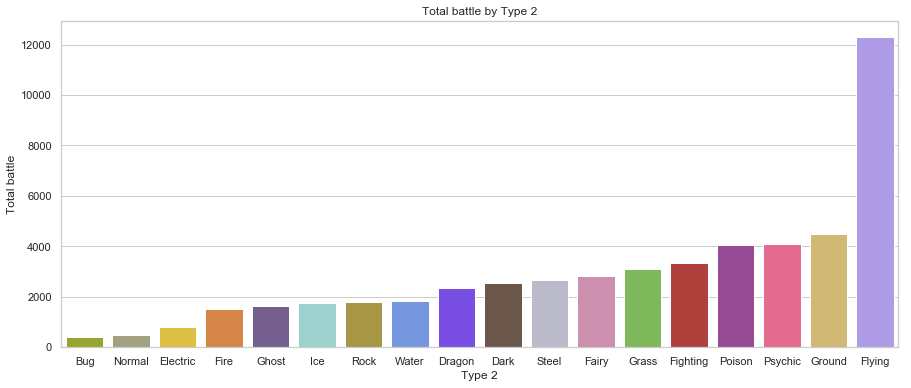

In [29]:
f, ax = plt.subplots(figsize=(15, 6))

data = wl_pkm.groupby(['Type 2'], as_index=False).sum()
order = data.sort_values(ascending=True, by=['Total battle'])

sns.barplot(x='Type 2', y="Total battle", data=data, palette=type1_colors, order=order['Type 2']).set_title('Total battle by Type 2');

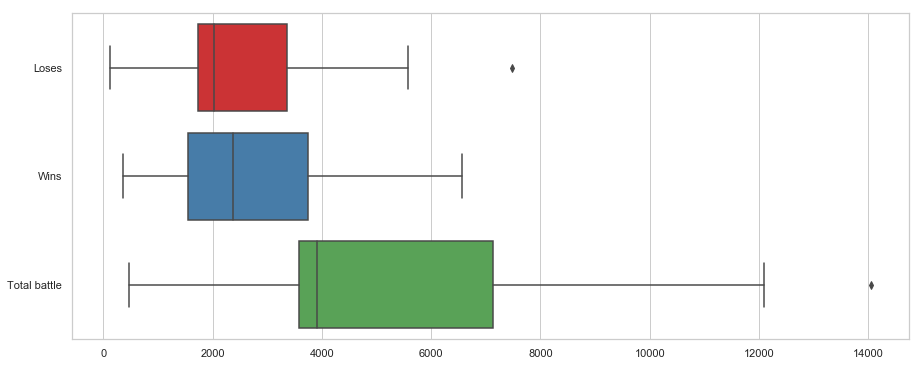

In [30]:
f, ax = plt.subplots(figsize=(15, 6))

data = wl_pkm.groupby(['Type 1'], as_index=False).sum()
order = data.sort_values(ascending=True, by=['Total battle'])

sns.boxplot(data=data[['Loses','Wins','Total battle']], palette="Set1", orient='h');

I think that <b>Total battle X Type</b> do not aggregate too much information because (most of) common types are the most used as well. <br>
Let's try <b>Type X Wins</b> and <b>Type X Loses</b>

#### Win by types

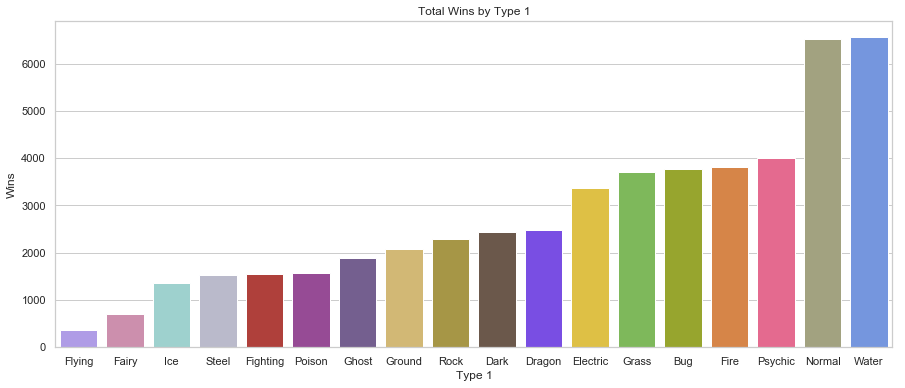

In [31]:
f, ax = plt.subplots(figsize=(15, 6))

data = wl_pkm.groupby(['Type 1'], as_index=False).sum()
order = data.sort_values(ascending=True, by=['Wins'])

sns.barplot(x='Type 1', y="Wins", data=data, palette=type1_colors, order=order['Type 1']).set_title('Total Wins by Type 1');

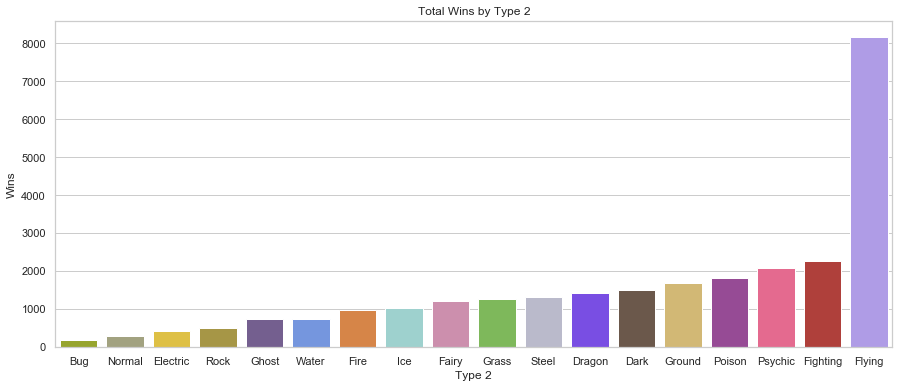

In [32]:
f, ax = plt.subplots(figsize=(15, 6))

data = wl_pkm.groupby(['Type 2'], as_index=False).sum()
order = data.sort_values(ascending=True, by=['Wins'])

sns.barplot(x='Type 2', y="Wins", data=data, palette=type1_colors, order=order['Type 2']).set_title('Total Wins by Type 2');

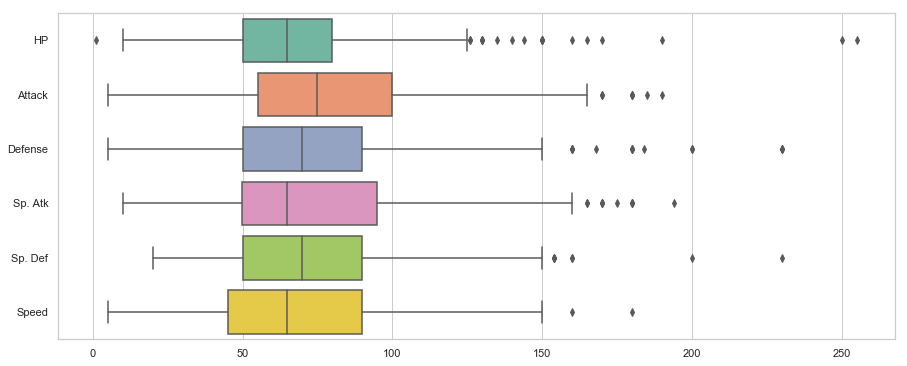

In [33]:
f, ax = plt.subplots(figsize=(15, 6))
sns.boxplot(data=wl_pkm[['HP','Attack','Defense','Sp. Atk','Sp. Def','Speed']], palette="Set2", orient='h');

In [34]:
# Melt DataFrame
melted_df = pd.melt(wl_pkm[["Name", "Type 1", "Type 2", 'HP','Attack','Defense','Sp. Atk','Sp. Def','Speed']], 
                    id_vars=["Name", "Type 1", "Type 2"], # Variables to keep
                    var_name="Stat") # Name of melted variable
melted_df.head()

,Name,Type 1,Type 2,Stat,value
0,Bulbasaur,Grass,Poison,HP,45
1,Ivysaur,Grass,Poison,HP,60
2,Venusaur,Grass,Poison,HP,80
3,Mega Venusaur,Grass,Poison,HP,80
4,Charmander,Fire,NaN,HP,39


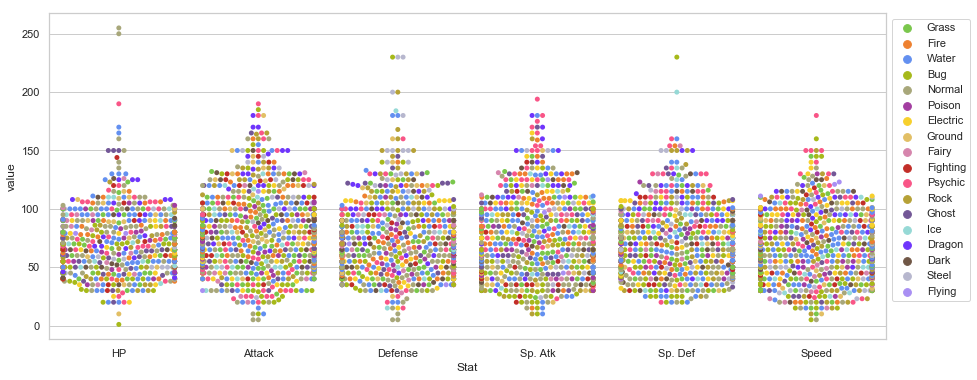

In [35]:
f, ax = plt.subplots(figsize=(15, 6))
sns.swarmplot(x='Stat', y='value', data=melted_df, hue='Type 1', palette=type1_colors)
plt.legend(bbox_to_anchor=(1, 1), loc=2)

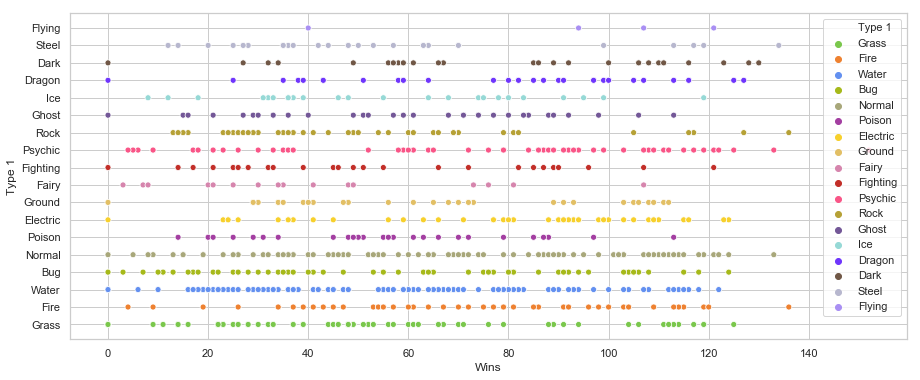

In [36]:
# data = wl_pkm.groupby(['Type 1'], as_index=False).sum()
data = wl_pkm

f, ax = plt.subplots(figsize=(15, 6))
# ax.scatter(data['Type 1'], data['Wins'], alpha=0.3, edgecolors='none')

# ax.legend()
# ax.grid(True)
# plt.show();

sns.scatterplot(y="Type 1", x="Wins", hue="Type 1", data=data, palette=type1_colors)

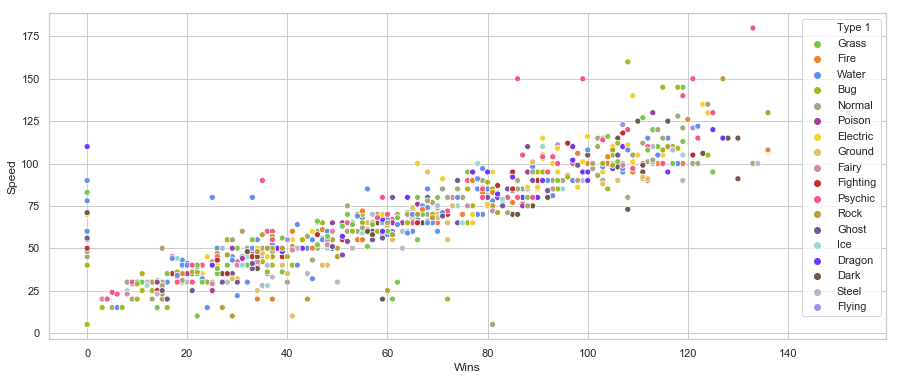

In [37]:
data = wl_pkm

f, ax = plt.subplots(figsize=(15, 6))

sns.scatterplot(y="Speed", x="Wins", hue="Type 1", data=data, palette=type1_colors)

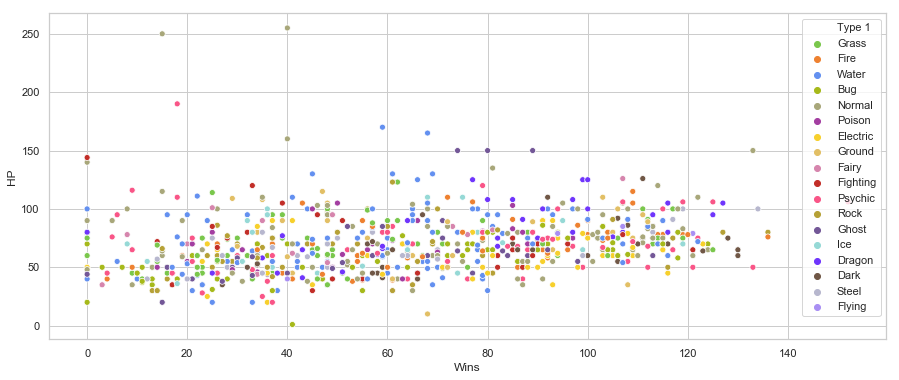

In [38]:
data = wl_pkm

f, ax = plt.subplots(figsize=(15, 6))

sns.scatterplot(y="HP", x="Wins", hue="Type 1", data=data, palette=type1_colors)

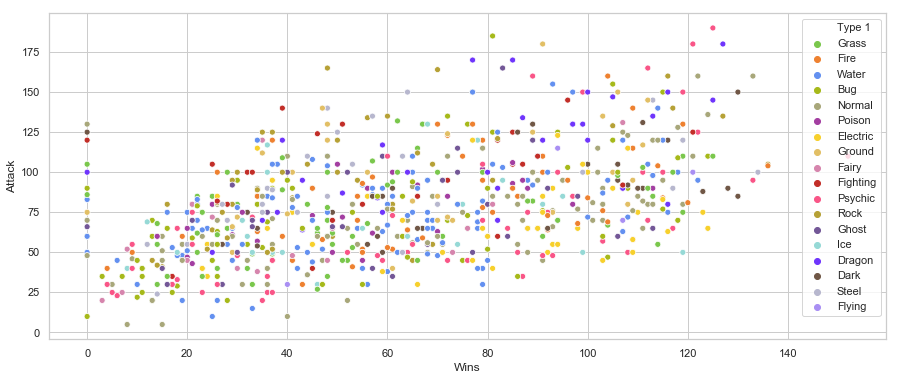

In [39]:
data = wl_pkm

f, ax = plt.subplots(figsize=(15, 6))

sns.scatterplot(y="Attack", x="Wins", hue="Type 1", data=data, palette=type1_colors)

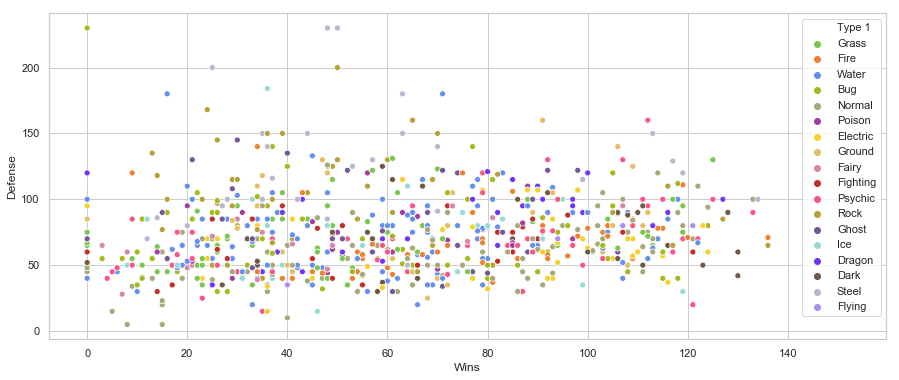

In [40]:
data = wl_pkm

f, ax = plt.subplots(figsize=(15, 6))

sns.scatterplot(y="Defense", x="Wins", hue="Type 1", data=data, palette=type1_colors)

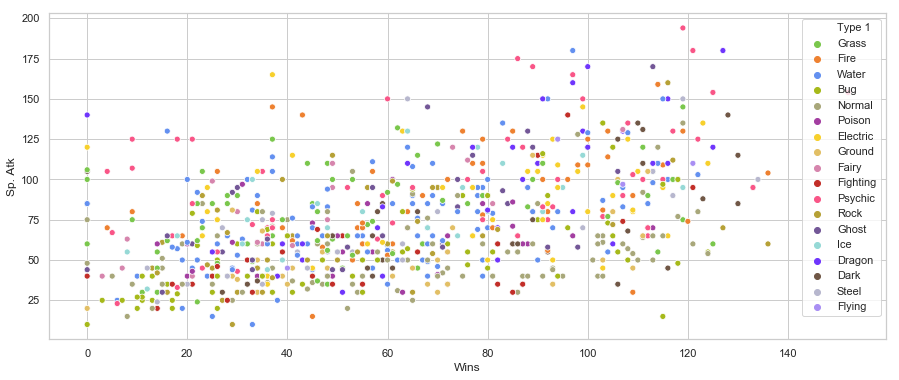

In [41]:
data = wl_pkm

f, ax = plt.subplots(figsize=(15, 6))

sns.scatterplot(y="Sp. Atk", x="Wins", hue="Type 1", data=data, palette=type1_colors)

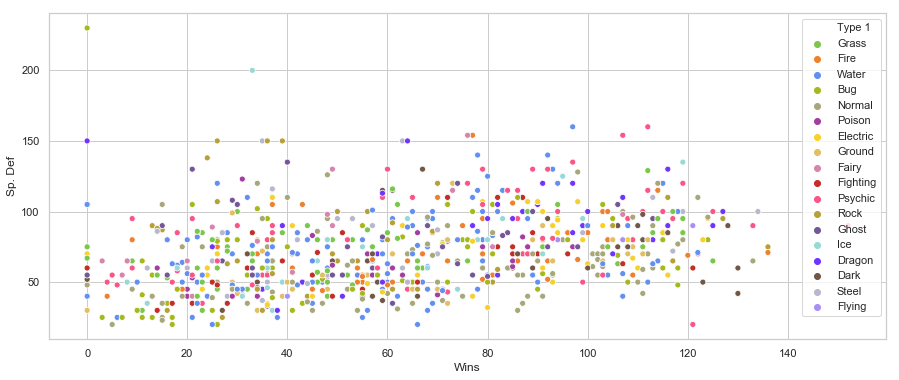

In [42]:
data = wl_pkm

f, ax = plt.subplots(figsize=(15, 6))

sns.scatterplot(y="Sp. Def", x="Wins", hue="Type 1", data=data, palette=type1_colors)

In [43]:
corr_cols = ['HP','Attack','Defense','Sp. Atk','Sp. Def','Speed', 'Wins', 'Loses']
wl_pkm[corr_cols].corr(method='pearson')[['Wins', 'Loses']]

,Wins,Loses
HP,0.237030,-0.259229
Attack,0.479151,-0.464690
Defense,0.125996,-0.082763
Sp. Atk,0.451729,-0.450815
Sp. Def,0.295788,-0.273137
Speed,0.887872,-0.880949
Wins,1.000000,-0.807633
Loses,-0.807633,1.000000


In [44]:
wl_pkm[corr_cols].corr(method='spearman')[['Wins', 'Loses']]

,Wins,Loses
HP,0.328870,-0.333434
Attack,0.477560,-0.463808
Defense,0.190476,-0.159220
Sp. Atk,0.445637,-0.446872
Sp. Def,0.356149,-0.324255
Speed,0.910114,-0.905256
Wins,1.000000,-0.831731
Loses,-0.831731,1.000000


In [45]:
wl_pkm[corr_cols].corr(method='kendall')[['Wins', 'Loses']]

,Wins,Loses
HP,0.226487,-0.226598
Attack,0.333986,-0.320218
Defense,0.128620,-0.106106
Sp. Atk,0.315692,-0.314562
Sp. Def,0.243490,-0.219746
Speed,0.775618,-0.780667
Wins,1.000000,-0.724975
Loses,-0.724975,1.000000


<hr>

### Prepare data

In [46]:
# Fix Pokemon name null - Pokemon after Mankey = Primeape
wl_pkm.loc[wl_pkm["Name"].isna(), "Name"] = "Primeape"
wl_pkm.loc[63]

Name            Primeape
Type 1          Fighting
Type 2               NaN
HP                    65
Attack               105
Defense               60
Sp. Atk               60
Sp. Def               70
Speed                 95
Generation             1
Legendary          False
Wins                  85
Loses                 23
Total battle         108
Name: 63, dtype: object

In [47]:
cbt = df_combats
cbt = cbt.rename(index=str, columns={"First_pokemon": "pk1", "Second_pokemon": "pk2"})
cbt.head()

,pk1,pk2,Winner
0,266,298,298
1,702,701,701
2,191,668,668
3,237,683,683
4,151,231,151


In [48]:
pk_cols = ['pk1_HP', 'pk1_Attack', 'pk1_Defense', 'pk1_Sp. Atk', 'pk1_Sp. Def', 'pk1_Speed','pk2_HP', 'pk2_Attack', 'pk2_Defense', 'pk2_Sp. Atk', 'pk2_Sp. Def', 'pk2_Speed']
for col in pk_cols:
    cbt[col] = 0

cbt.head()

,pk1,pk2,Winner,pk1_HP,pk1_Attack,pk1_Defense,pk1_Sp. Atk,pk1_Sp. Def,pk1_Speed,pk2_HP,pk2_Attack,pk2_Defense,pk2_Sp. Atk,pk2_Sp. Def,pk2_Speed
0,266,298,298,0,0,0,0,0,0,0,0,0,0,0,0
1,702,701,701,0,0,0,0,0,0,0,0,0,0,0,0
2,191,668,668,0,0,0,0,0,0,0,0,0,0,0,0
3,237,683,683,0,0,0,0,0,0,0,0,0,0,0,0
4,151,231,151,0,0,0,0,0,0,0,0,0,0,0,0


In [49]:
cols = ['HP','Attack','Defense','Sp. Atk','Sp. Def','Speed']

def set_combat_values(df_cb, df_pk, cols):
    cb = df_cb
    for ix in cb.index:
        pk1 = cb.at[ix, 'pk1']
        pk2 =  cb.at[ix, 'pk2']
        for c in cols:
            cb.at[ix, 'pk1_' + c] = df_pk.at[pk1, c]
            cb.at[ix, 'pk2_' + c] = df_pk.at[pk2, c]
    return cb

In [50]:
cbt_train = set_combat_values(cbt, wl_pkm, cols)
cbt_train.head()

,pk1,pk2,Winner,pk1_HP,pk1_Attack,pk1_Defense,pk1_Sp. Atk,pk1_Sp. Def,pk1_Speed,pk2_HP,pk2_Attack,pk2_Defense,pk2_Sp. Atk,pk2_Sp. Def,pk2_Speed
0,266,298,298,50,64,50,45,50,41,70,70,40,60,40,60
1,702,701,701,91,90,72,90,129,108,91,129,90,72,90,108
2,191,668,668,55,40,85,80,105,40,75,75,75,125,95,40
3,237,683,683,40,40,40,70,40,20,77,120,90,60,90,48
4,151,231,151,70,60,125,115,70,55,20,10,230,10,230,5


In [51]:
cbt_train.tail()

,pk1,pk2,Winner,pk1_HP,pk1_Attack,pk1_Defense,pk1_Sp. Atk,pk1_Sp. Def,pk1_Speed,pk2_HP,pk2_Attack,pk2_Defense,pk2_Sp. Atk,pk2_Sp. Def,pk2_Speed
49995,707,126,707,100,120,100,150,120,90,30,40,70,70,25,60
49996,589,664,589,60,85,40,30,45,68,35,55,40,45,40,60
49997,303,368,368,60,50,100,85,70,65,73,115,60,60,60,90
49998,109,89,109,40,30,50,55,55,100,25,35,70,95,55,45
49999,9,73,9,78,104,78,159,115,100,70,80,50,35,35,35


In [52]:
cbt_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50000 entries, 0 to 49999
Data columns (total 15 columns):
pk1            50000 non-null int64
pk2            50000 non-null int64
Winner         50000 non-null int64
pk1_HP         50000 non-null int64
pk1_Attack     50000 non-null int64
pk1_Defense    50000 non-null int64
pk1_Sp. Atk    50000 non-null int64
pk1_Sp. Def    50000 non-null int64
pk1_Speed      50000 non-null int64
pk2_HP         50000 non-null int64
pk2_Attack     50000 non-null int64
pk2_Defense    50000 non-null int64
pk2_Sp. Atk    50000 non-null int64
pk2_Sp. Def    50000 non-null int64
pk2_Speed      50000 non-null int64
dtypes: int64(15)
memory usage: 7.4+ MB


In [53]:
wl_pkm_num_type = wl_pkm
wl_pkm_num_type['Type 1 num'] = wl_pkm_num_type['Type 1'].astype('category').cat.codes
wl_pkm_num_type['Type 2 num'] = wl_pkm_num_type['Type 2'].astype('category').cat.codes

<hr>

In [54]:
cols = ['HP','Attack','Defense','Sp. Atk','Sp. Def','Speed', 'Type 1 num', 'Type 2 num']

In [55]:
cbt_train = set_combat_values(cbt, wl_pkm_num_type, cols)
cbt_train.head()

,pk1,pk2,Winner,pk1_HP,pk1_Attack,pk1_Defense,pk1_Sp. Atk,pk1_Sp. Def,pk1_Speed,pk2_HP,pk2_Attack,pk2_Defense,pk2_Sp. Atk,pk2_Sp. Def,pk2_Speed,pk1_Type 1 num,pk2_Type 1 num,pk1_Type 2 num,pk2_Type 2 num
0,266,298,298,50,64,50,45,50,41,70,70,40,60,40,60,15.0,9.0,10.0,1.0
1,702,701,701,91,90,72,90,129,108,91,129,90,72,90,108,9.0,15.0,5.0,5.0
2,191,668,668,55,40,85,80,105,40,75,75,75,125,95,40,4.0,14.0,7.0,-1.0
3,237,683,683,40,40,40,70,40,20,77,120,90,60,90,48,6.0,2.0,-1.0,-1.0
4,151,231,151,70,60,125,115,70,55,20,10,230,10,230,5,15.0,0.0,17.0,15.0


In [56]:
cbt_train.tail()

,pk1,pk2,Winner,pk1_HP,pk1_Attack,pk1_Defense,pk1_Sp. Atk,pk1_Sp. Def,pk1_Speed,pk2_HP,pk2_Attack,pk2_Defense,pk2_Sp. Atk,pk2_Sp. Def,pk2_Speed,pk1_Type 1 num,pk2_Type 1 num,pk1_Type 2 num,pk2_Type 2 num
49995,707,126,707,100,120,100,150,120,90,30,40,70,70,25,60,2.0,17.0,6.0,-1.0
49996,589,664,589,60,85,40,30,45,68,35,55,40,45,40,60,10.0,3.0,-1.0,-1.0
49997,303,368,368,60,50,100,85,70,65,73,115,60,60,60,90,17.0,12.0,7.0,-1.0
49998,109,89,109,40,30,50,55,55,100,25,35,70,95,55,45,3.0,3.0,-1.0,16.0
49999,9,73,9,78,104,78,159,115,100,70,80,50,35,35,35,6.0,5.0,7.0,-1.0


In [57]:
cbt_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50000 entries, 0 to 49999
Data columns (total 19 columns):
pk1               50000 non-null int64
pk2               50000 non-null int64
Winner            50000 non-null int64
pk1_HP            50000 non-null int64
pk1_Attack        50000 non-null int64
pk1_Defense       50000 non-null int64
pk1_Sp. Atk       50000 non-null int64
pk1_Sp. Def       50000 non-null int64
pk1_Speed         50000 non-null int64
pk2_HP            50000 non-null int64
pk2_Attack        50000 non-null int64
pk2_Defense       50000 non-null int64
pk2_Sp. Atk       50000 non-null int64
pk2_Sp. Def       50000 non-null int64
pk2_Speed         50000 non-null int64
pk1_Type 1 num    50000 non-null float64
pk2_Type 1 num    50000 non-null float64
pk1_Type 2 num    50000 non-null float64
pk2_Type 2 num    50000 non-null float64
dtypes: float64(4), int64(15)
memory usage: 8.9+ MB


#### Remove outliers

In [58]:
from scipy import stats

In [59]:
cbt_clean = cbt_train[(np.abs(stats.zscore(cbt_train)) < 3).all(axis=1)]

In [60]:
cbt_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46007 entries, 0 to 49999
Data columns (total 19 columns):
pk1               46007 non-null int64
pk2               46007 non-null int64
Winner            46007 non-null int64
pk1_HP            46007 non-null int64
pk1_Attack        46007 non-null int64
pk1_Defense       46007 non-null int64
pk1_Sp. Atk       46007 non-null int64
pk1_Sp. Def       46007 non-null int64
pk1_Speed         46007 non-null int64
pk2_HP            46007 non-null int64
pk2_Attack        46007 non-null int64
pk2_Defense       46007 non-null int64
pk2_Sp. Atk       46007 non-null int64
pk2_Sp. Def       46007 non-null int64
pk2_Speed         46007 non-null int64
pk1_Type 1 num    46007 non-null float64
pk2_Type 1 num    46007 non-null float64
pk1_Type 2 num    46007 non-null float64
pk2_Type 2 num    46007 non-null float64
dtypes: float64(4), int64(15)
memory usage: 7.0+ MB


In [61]:
cbt_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50000 entries, 0 to 49999
Data columns (total 19 columns):
pk1               50000 non-null int64
pk2               50000 non-null int64
Winner            50000 non-null int64
pk1_HP            50000 non-null int64
pk1_Attack        50000 non-null int64
pk1_Defense       50000 non-null int64
pk1_Sp. Atk       50000 non-null int64
pk1_Sp. Def       50000 non-null int64
pk1_Speed         50000 non-null int64
pk2_HP            50000 non-null int64
pk2_Attack        50000 non-null int64
pk2_Defense       50000 non-null int64
pk2_Sp. Atk       50000 non-null int64
pk2_Sp. Def       50000 non-null int64
pk2_Speed         50000 non-null int64
pk1_Type 1 num    50000 non-null float64
pk2_Type 1 num    50000 non-null float64
pk1_Type 2 num    50000 non-null float64
pk2_Type 2 num    50000 non-null float64
dtypes: float64(4), int64(15)
memory usage: 8.9+ MB


In [62]:
cb_total = pd.concat([cbt_train,cbt_clean]).drop_duplicates(keep=False)

In [63]:
cb_total.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3662 entries, 4 to 49984
Data columns (total 19 columns):
pk1               3662 non-null int64
pk2               3662 non-null int64
Winner            3662 non-null int64
pk1_HP            3662 non-null int64
pk1_Attack        3662 non-null int64
pk1_Defense       3662 non-null int64
pk1_Sp. Atk       3662 non-null int64
pk1_Sp. Def       3662 non-null int64
pk1_Speed         3662 non-null int64
pk2_HP            3662 non-null int64
pk2_Attack        3662 non-null int64
pk2_Defense       3662 non-null int64
pk2_Sp. Atk       3662 non-null int64
pk2_Sp. Def       3662 non-null int64
pk2_Speed         3662 non-null int64
pk1_Type 1 num    3662 non-null float64
pk2_Type 1 num    3662 non-null float64
pk1_Type 2 num    3662 non-null float64
pk2_Type 2 num    3662 non-null float64
dtypes: float64(4), int64(15)
memory usage: 572.2+ KB


In [64]:
cb_total.head()

,pk1,pk2,Winner,pk1_HP,pk1_Attack,pk1_Defense,pk1_Sp. Atk,pk1_Sp. Def,pk1_Speed,pk2_HP,pk2_Attack,pk2_Defense,pk2_Sp. Atk,pk2_Sp. Def,pk2_Speed,pk1_Type 1 num,pk2_Type 1 num,pk1_Type 2 num,pk2_Type 2 num
4,151,231,151,70,60,125,115,70,55,20,10,230,10,230,5,15.0,0.0,17.0,15.0
7,73,545,545,70,80,50,35,35,35,150,100,120,100,120,90,5.0,8.0,-1.0,2.0
48,231,146,146,20,10,230,10,230,5,130,65,60,110,95,65,0.0,17.0,15.0,-1.0
51,164,751,751,106,190,100,154,100,130,60,150,50,150,50,60,14.0,16.0,5.0,8.0
109,793,314,314,126,131,95,131,98,99,150,160,100,95,65,100,4.0,12.0,-1.0,-1.0


In [65]:
cb_total.tail()

,pk1,pk2,Winner,pk1_HP,pk1_Attack,pk1_Defense,pk1_Sp. Atk,pk1_Sp. Def,pk1_Speed,pk2_HP,pk2_Attack,pk2_Defense,pk2_Sp. Atk,pk2_Sp. Def,pk2_Speed,pk1_Type 1 num,pk2_Type 1 num,pk1_Type 2 num,pk2_Type 2 num
49954,215,474,474,95,75,80,100,110,30,150,80,44,90,54,80,17.0,8.0,14.0,7.0
49957,473,656,473,90,50,34,60,44,70,165,75,80,40,45,65,8.0,17.0,7.0,-1.0
49969,192,545,545,40,50,45,70,45,70,150,100,120,100,120,90,14.0,8.0,7.0,2.0
49979,540,233,540,75,125,70,125,70,115,80,185,115,40,105,75,14.0,0.0,-1.0,5.0
49984,126,425,425,30,40,70,70,25,60,100,180,160,150,90,90,17.0,10.0,-1.0,6.0


### Train-Test split

In [66]:
features_names = ['pk1_HP', 'pk1_Attack', 'pk1_Defense', 'pk1_Sp. Atk', 'pk1_Sp. Def', 'pk1_Speed', 'pk2_HP', 'pk2_Attack', 'pk2_Defense', 'pk2_Sp. Atk', 'pk2_Sp. Def', 'pk2_Speed', 'pk1_Type 1 num', 'pk2_Type 1 num', 'pk1_Type 2 num', 'pk2_Type 2 num']

In [67]:
X = cbt_train[features_names]
X.head()

,pk1_HP,pk1_Attack,pk1_Defense,pk1_Sp. Atk,pk1_Sp. Def,pk1_Speed,pk2_HP,pk2_Attack,pk2_Defense,pk2_Sp. Atk,pk2_Sp. Def,pk2_Speed,pk1_Type 1 num,pk2_Type 1 num,pk1_Type 2 num,pk2_Type 2 num
0,50,64,50,45,50,41,70,70,40,60,40,60,15.0,9.0,10.0,1.0
1,91,90,72,90,129,108,91,129,90,72,90,108,9.0,15.0,5.0,5.0
2,55,40,85,80,105,40,75,75,75,125,95,40,4.0,14.0,7.0,-1.0
3,40,40,40,70,40,20,77,120,90,60,90,48,6.0,2.0,-1.0,-1.0
4,70,60,125,115,70,55,20,10,230,10,230,5,15.0,0.0,17.0,15.0


In [68]:
y = cbt_train[['pk1', 'pk2', 'Winner']]
y['Result'] = np.where(y['pk1'] == y['Winner'], 1, 2);
y.head()

/home/flatline/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,pk1,pk2,Winner,Result
0,266,298,298,2
1,702,701,701,2
2,191,668,668,2
3,237,683,683,2
4,151,231,151,1


In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y['Result'], test_size=0.33, random_state=42)

###  Explore models

In [70]:
from sklearn.svm import SVC
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [71]:
models = []

In [72]:
c_svc = SVC(gamma='auto', random_state=42)
models.append(c_svc)

In [73]:
c_svm = svm.SVC(gamma='scale', decision_function_shape='ovo', random_state=42)
models.append(c_svc)

In [74]:
c_knn = KNeighborsClassifier(n_neighbors=10)
models.append(c_knn)

In [75]:
c_gbc = GradientBoostingClassifier(n_estimators=10, random_state=42)
models.append(c_gbc)

In [76]:
c_rc = RandomForestClassifier(n_estimators=10, random_state=42)
models.append(c_rc)

In [77]:
c_ada = AdaBoostClassifier(n_estimators=10, random_state=42)
models.append(c_ada)

In [78]:
import time

In [79]:
for model in models:
    start_time = time.time()
    model.fit(X_train, y_train)
    print("--- %s seconds ---" % (time.time() - start_time))
    print('')

--- 213.84639143943787 seconds ---

--- 207.76299953460693 seconds ---

--- 0.03832364082336426 seconds ---

--- 0.3694322109222412 seconds ---

--- 0.4747495651245117 seconds ---

--- 0.24350810050964355 seconds ---



### Results

In [80]:
for model in models:
    start_time = time.time()
    print(model.score(X_test, y_test))
    print("--- %s seconds ---" % (time.time() - start_time))
    print('')

0.5542424242424242
--- 22.196144342422485 seconds ---

0.5542424242424242
--- 23.023613452911377 seconds ---

0.8783636363636363
--- 9.495181322097778 seconds ---

0.9001212121212121
--- 0.006774425506591797 seconds ---

0.938969696969697
--- 0.03374004364013672 seconds ---

0.8348484848484848
--- 0.01859426498413086 seconds ---



#### GradientBoostingClassifier VS RandomForestClassifier

In [81]:
from sklearn.model_selection import cross_val_score, cross_val_predict

In [82]:
scores = cross_val_score(c_gbc, X_train, y_train, cv=10)
print(scores)
print(np.mean(scores))

[0.88898836 0.90361086 0.89883617 0.89435989 0.90268657 0.90179104
 0.89997014 0.91161541 0.90415049 0.89817856]
0.9004187498303399


In [83]:
scores = cross_val_score(c_gbc, X_train, y_train, cv=50)
print(scores)
print(np.mean(scores))

[0.89865872 0.91207154 0.88673621 0.86736215 0.91058122 0.89269747
 0.91803279 0.90163934 0.90163934 0.90909091 0.87630402 0.91058122
 0.90014903 0.92101341 0.91641791 0.91791045 0.90149254 0.89552239
 0.89253731 0.89701493 0.91044776 0.89701493 0.90447761 0.88507463
 0.90746269 0.89253731 0.90895522 0.88507463 0.89104478 0.89552239
 0.91791045 0.9        0.90298507 0.88955224 0.9238806  0.89552239
 0.9103139  0.90732436 0.9103139  0.9058296  0.91180867 0.89686099
 0.89088191 0.89686099 0.89985052 0.88490284 0.89387145 0.89686099
 0.90134529 0.89686099]
0.9007760396722554


In [84]:
scores = cross_val_score(c_rc, X_train, y_train, cv=10)
print(scores)
print(np.mean(scores))

[0.93882423 0.94359893 0.93494479 0.93613847 0.93402985 0.93104478
 0.92893401 0.93729471 0.93580173 0.9295312 ]
0.9350142703057973


In [85]:
scores = cross_val_score(c_rc, X_train, y_train, cv=50)
print(scores)
print(np.mean(scores))

[0.93442623 0.95081967 0.93591654 0.93591654 0.94634873 0.92995529
 0.94634873 0.94038748 0.92846498 0.93889717 0.9195231  0.93591654
 0.94336811 0.93740686 0.94328358 0.94776119 0.92686567 0.93134328
 0.92686567 0.95373134 0.9358209  0.92537313 0.93134328 0.93880597
 0.95373134 0.93432836 0.94477612 0.94477612 0.9358209  0.93432836
 0.94328358 0.92238806 0.93283582 0.93283582 0.93432836 0.94029851
 0.92227205 0.92825112 0.94618834 0.93273543 0.9431988  0.93423019
 0.93124066 0.94469357 0.92227205 0.92825112 0.95067265 0.9387145
 0.9431988  0.93721973]
0.9368352072548447


In [86]:
scores = cross_val_score(c_gbc, X_train, y_train, cv=10)
print(scores)

[0.88898836 0.90361086 0.89883617 0.89435989 0.90268657 0.90179104
 0.89997014 0.91161541 0.90415049 0.89817856]


In [87]:
for model in models:
    scores = cross_val_score(model, X_train, y_train, cv=10)
    print(scores)

[0.54819457 0.55625187 0.55177559 0.55237243 0.55164179 0.54656716
 0.55091072 0.5527023  0.56016721 0.55120932]
[0.54819457 0.55625187 0.55177559 0.55237243 0.55164179 0.54656716
 0.55091072 0.5527023  0.56016721 0.55120932]
[0.87914056 0.88809311 0.87287377 0.87406744 0.8719403  0.87641791
 0.87249925 0.87429083 0.86712451 0.8769782 ]
[0.88898836 0.90361086 0.89883617 0.89435989 0.90268657 0.90179104
 0.89997014 0.91161541 0.90415049 0.89817856]
[0.93882423 0.94359893 0.93494479 0.93613847 0.93402985 0.93104478
 0.92893401 0.93729471 0.93580173 0.9295312 ]
[0.83079678 0.83407938 0.82661892 0.82811101 0.83104478 0.82567164
 0.8333831  0.83995222 0.82890415 0.82770976]


### Tunning the model
RandomForestClassifier

In [107]:
from sklearn.model_selection import GridSearchCV

In [118]:
# tuned_parameters = {"max_depth": [3, None],
#               "max_features": [1, 3, 10],
#               "min_samples_split": [2, 3, 10],
#               "bootstrap": [True, False],
#               "criterion": ["gini", "entropy"],
#                 "random_state": [42]}
tuned_parameters = [{'n_estimators': [10, 50, 100], 'criterion': ['gini', 'entropy'],
                     'random_state': [42], 'min_samples_split': [2,3,4],'min_samples_leaf': [2,3,4]},
                   ]
# {'criterion': 'gini', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100, 'random_state': 42}
# {'bootstrap': False, 'criterion': 'entropy', 'max_depth': None, 'max_features': 10, 'min_samples_split': 10}
# {'bootstrap': False, 'criterion': 'entropy', 'max_depth': None, 'max_features': 10, 'min_samples_split': 10, 'random_state': 42}



In [119]:
scores = ['precision', 'recall']

In [120]:
from sklearn.metrics import classification_report

In [121]:
import warnings
warnings.filterwarnings('ignore')

In [122]:
for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(RandomForestClassifier(random_state=42), tuned_parameters, cv=5,
                       scoring='%s_macro' % score)
    clf.fit(X_train, y_train)
    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()

# Tuning hyper-parameters for precision

Best parameters set found on development set:

{'criterion': 'gini', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100, 'random_state': 42}

Grid scores on development set:

0.934 (+/-0.004) for {'criterion': 'gini', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 10, 'random_state': 42}
0.943 (+/-0.003) for {'criterion': 'gini', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50, 'random_state': 42}
0.944 (+/-0.002) for {'criterion': 'gini', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100, 'random_state': 42}
0.934 (+/-0.004) for {'criterion': 'gini', 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 10, 'random_state': 42}
0.943 (+/-0.003) for {'criterion': 'gini', 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 50, 'random_state': 42}
0.944 (+/-0.002) for {'criterion': 'gini', 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 100, 'rando

              precision    recall  f1-score   support

           1       0.94      0.95      0.94      7837
           2       0.95      0.95      0.95      8663

   micro avg       0.95      0.95      0.95     16500
   macro avg       0.95      0.95      0.95     16500
weighted avg       0.95      0.95      0.95     16500




In [126]:
clf = RandomForestClassifier(random_state=42, bootstrap = False, criterion = 'entropy', max_depth = None, max_features = 10, min_samples_split = 10)
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, class_weight=None,
            criterion='entropy', max_depth=None, max_features=10,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=10, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=None, oob_score=False, random_state=42,
            verbose=0, warm_start=False)

In [128]:
scores = cross_val_score(clf, X_train, y_train, cv=10)
print(scores)
print(np.mean(scores))

[0.9528499  0.95344673 0.94926887 0.9528499  0.9561194  0.94925373
 0.95103016 0.95013437 0.95013437 0.94923858]
0.9514326006589698


In [129]:
scores = cross_val_score(clf, X_test, y_test, cv=10)
print(scores)
print(np.mean(scores))

[0.94124773 0.94972744 0.95154452 0.93818182 0.94727273 0.94606061
 0.94060606 0.93389933 0.94238933 0.9417829 ]
0.9432712455680898


In [175]:
def create_dataframe(pk_number1, pk_number2):
    data = [[pk_number1, pk_number2]]
    df = pd.DataFrame(data, columns = ['pk1', 'pk2'])
    pk_cols = ['pk1_HP', 'pk1_Attack', 'pk1_Defense', 'pk1_Sp. Atk', 'pk1_Sp. Def', 'pk1_Speed','pk2_HP', 'pk2_Attack', 'pk2_Defense', 'pk2_Sp. Atk', 'pk2_Sp. Def', 'pk2_Speed']
    for col in pk_cols:
        df[col] = 0
    return df


def get_combat_values(df, df_pkm, cols):
    cb = df
    for ix in cb.index:
        pk1 = cb.at[ix, 'pk1']
        pk2 =  cb.at[ix, 'pk2']
        
        names = [df_pkm.at[pk1, 'Name'], df_pkm.at[pk2, 'Name']]
        
        
        for c in cols:
            cb.at[ix, 'pk1_' + c] = df_pkm.at[pk1, c]
            cb.at[ix, 'pk2_' + c] = df_pkm.at[pk2, c]
    return cb, names


def run(pk_number1, pk_number2):
    df_pkm = pd.read_csv('pokemon-challenge/pokemon.csv')
    df_pkm.set_index(['#'])
    
    cols = ['HP','Attack','Defense','Sp. Atk','Sp. Def','Speed', 'Type 1 num', 'Type 2 num']
    
    df_pkm_type = df_pkm
    
    
    df_pkm_type['Type 1 num'] = df_pkm['Type 1'].astype('category').cat.codes
    df_pkm_type['Type 2 num'] = df_pkm['Type 2'].astype('category').cat.codes
    
    df = create_dataframe(pk_number1, pk_number2)
    cb, names = get_combat_values(df, df_pkm_type, cols)
    
    return cb, names

# def main()

In [190]:
battle, names = run(258, 262)
print(names)
battle.head()

['Elekid', 'Raikou']


,pk1,pk2,pk1_HP,pk1_Attack,pk1_Defense,pk1_Sp. Atk,pk1_Sp. Def,pk1_Speed,pk2_HP,pk2_Attack,pk2_Defense,pk2_Sp. Atk,pk2_Sp. Def,pk2_Speed,pk1_Type 1 num,pk2_Type 1 num,pk1_Type 2 num,pk2_Type 2 num
0,258,262,45,63,37,65,55,95,90,85,75,115,100,115,3.0,3.0,-1.0,-1.0


In [191]:
prediction = clf.predict(battle.drop(['pk1', 'pk2'], axis=1))

In [192]:
prediction[0]

2

### Final results

### Conclusion